# 📘 INF 4127 :TPE CALCUL SYMBOLIQUE

Dans ce notebook, nous allons présenter un problème d’optimisation inspiré d’une situation réelle simplifiée, et **nous utiliserons SymPy pour effectuer les calculs symboliques nécessaires à sa résolution**.

Une petite **usine** fabrique deux produits :
- **Produit A** : quantité $x$
- **Produit B** : quantité $y$

La demande totale à satisfaire est fixée :
$$x + y = D$$

Le **coût total de production** est donné par :
$$C(x,y) = a x^2 + b y^2 + c x + d y$$

où :
- $a,b > 0$ modélisent la croissance des coûts marginaux (plus on produit, plus c'est cher)
- $c,d$ représentent les coûts linéaires de production (main d’œuvre, énergie, etc.)

Notre objectif est :
- **Minimiser le coût total** $C(x,y)$
- **Sous contrainte** : $x + y = D$ et $x, y \ge 0$

---
## Plan du notebook

1. **Définition du problème (formules)**  
   - Présentation des produits, de la demande totale et du coût de production.  
   - Identification des contraintes de production.

2. **Résolution symbolique avec SymPy (méthode du Lagrangien)**  
   - Construction du Lagrangien.  
   - Calcul des dérivées partielles.  
   - Résolution symbolique pour obtenir la solution générale.

3. **Instanciation numérique et solution candidate**  
   - Substitution des valeurs numériques des paramètres.  
   - Extraction de la solution candidate intérieure.

4. **Vérification des solutions admissibles**  
   - Vérification de la positivité des quantités.  
   - Considération des solutions frontières : tout en A ou tout en B.


5. **Visualisation graphique des scénarios**  
   - Tracé des contours de coût.  
   - Affichage de la contrainte x+y=D.  
   - Distinction claire des différents scénarios (intérieure, tout A, tout B).  
   - Mise en évidence du point optimal.  
   - Affichage des coûts associés à chaque scénario.

6. **Analyse complémentaire (optionnelle)**  
   - Graphique comparatif des coûts pour visualiser l’écart entre solutions.  
   - Interprétation économique de la répartition optimale.

7. **Conclusion et interprétation**  
   - Résumé de la solution optimale et des coûts.  
   - Explication de la stratégie optimale de production.  
   - Signification du scénario intérieur et des solutions de bord.

---


In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# 1) Paramètres du problème
# -------------------------
D_value = 30.0    # Demande totale
a, b = 0.5, 0.8   # coefficients quadratiques
c, d = 2.0, 1.0   # coefficients linéaires
tol = 1e-9        # tolérance numérique

# Définition symbolique
x, y, lam = sp.symbols('x y lam', real=True)
a_s, b_s, c_s, d_s, D = sp.symbols('a b c d D', real=True)

# Fonction coût
C = a_s*x**2 + b_s*y**2 + c_s*x + d_s*y

# Lagrangien
L = C + lam*(x + y - D)

# Conditions du premier ordre (KKT sans inégalités)
dL_dx = sp.diff(L, x)
dL_dy = sp.diff(L, y)
dL_dlam = sp.diff(L, lam)

# Résolution symbolique
sol_general = sp.solve([dL_dx, dL_dy, dL_dlam], (x, y, lam), dict=True)
sol_general

[{lam: (-2*D*a*b - a*d - b*c)/(a + b),
  x: (2*D*b - c + d)/(2*a + 2*b),
  y: (2*D*a + c - d)/(2*a + 2*b)}]

👉 Ici nous avons obtenu la **solution générale** $(x^*, y^*)$ en fonction des paramètres $(a,b,c,d,D)$.

In [ ]:
# -------------------------
# 2) Instanciation numérique
# -------------------------
subs_map = {a_s: a, b_s: b, c_s: c, d_s: d, D: D_value}

sol_num = [{k: sp.simplify(v.subs(subs_map)) for k, v in s.items()} for s in sol_general]
sol_num

[{lam: -20.0769230769231, x: 18.0769230769231, y: 11.9230769230769}]

👉 Nous obtenons la solution **candidate intérieure** pour les valeurs numériques choisies.

In [ ]:
# Extraire solution candidate
cand = sol_num[0]
x_cand = float(cand[x])
y_cand = float(cand[y])
x_cand, y_cand

(18.076923076923073, 11.923076923076922)

## 3. Vérification des contraintes
- Si $x^* \ge 0$ et $y^* \ge 0$, on garde la solution.
- Sinon, on compare avec les **solutions frontières** :
  - Tout en A : $(x=D, y=0)$
  - Tout en B : $(x=0, y=D)$

In [ ]:
def cost_eval(xv, yv):
    return float(C.subs({x: xv, y: yv, **subs_map}))

candidates = []

# solution intérieure
if x_cand >= -tol and y_cand >= -tol:
    candidates.append((x_cand, y_cand, 'intérieure', cost_eval(x_cand, y_cand)))
else:
    print("Solution intérieure non admissible.")

# solutions frontières
candidates.append((D_value, 0.0, 'tout A', cost_eval(D_value, 0.0)))
candidates.append((0.0, D_value, 'tout B', cost_eval(0.0, D_value)))

candidates

[(18.076923076923073, 11.923076923076922, 'intérieure', 325.1923076923076),
 (30.0, 0.0, 'tout A', 510.0),
 (0.0, 30.0, 'tout B', 750.0)]

## 4. Choix de la meilleure solution admissible
On compare les coûts et on choisit celle qui minimise $C(x,y)$.

In [ ]:
best = min(candidates, key=lambda t: t[3])
x_best, y_best, tag, best_cost = best
print(f"Solution optimale : x*={x_best:.2f}, y*={y_best:.2f}, scénario={tag}, coût={best_cost:.2f}")

Solution optimale : x*=18.08, y*=11.92, scénario=intérieure, coût=325.19


## 5. Visualisation
Nous représentons :
- Les **contours du coût** $C(x,y)$
- La **droite de contrainte** $x+y=D$
- Les **solutions candidates**
- Le **point optimal**

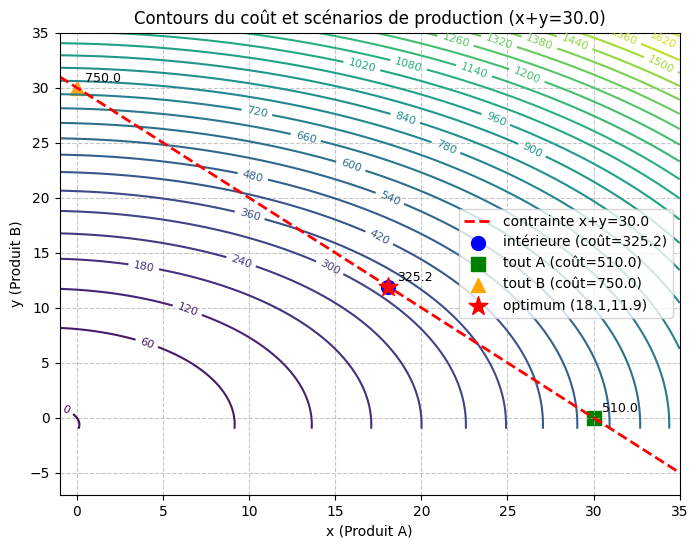

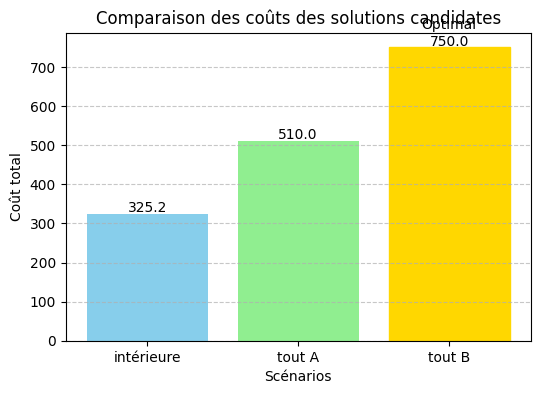

In [12]:
C_np = sp.lambdify((x, y, a_s, b_s, c_s, d_s), C, 'numpy')

x_vals = np.linspace(-1, D_value+5, 200)
y_vals = np.linspace(-1, D_value+5, 200)
Xg, Yg = np.meshgrid(x_vals, y_vals)
Zg = C_np(Xg, Yg, a, b, c, d)

plt.figure(figsize=(8,6))
cs = plt.contour(Xg, Yg, Zg, levels=30, cmap='viridis')
plt.clabel(cs, inline=True, fontsize=8)
plt.title(f"Contours du coût et scénarios de production (x+y={D_value})")
plt.xlabel("x (Produit A)")
plt.ylabel("y (Produit B)")

# contrainte
xx = np.linspace(min(x_vals), max(x_vals), 400)
yy = D_value - xx
plt.plot(xx, yy, 'r--', linewidth=2, label=f'contrainte x+y={D_value}')

# marquer candidats avec couleurs et formes différentes
colors = {'intérieure':'blue', 'tout A':'green', 'tout B':'orange'}
markers = {'intérieure':'o', 'tout A':'s', 'tout B':'^'}

for xi, yi, tag, ci in candidates:
    plt.scatter(xi, yi, color=colors[tag], marker=markers[tag], s=100, label=f'{tag} (coût={ci:.1f})')
    plt.text(xi+0.5, yi+0.5, f"{ci:.1f}", fontsize=9)

# marquer optimum
plt.scatter(x_best, y_best, color='red', marker='*', s=200, label=f'optimum ({x_best:.1f},{y_best:.1f})')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# -------------------------
# 6) Graphique comparatif des coûts
# -------------------------

labels = [tag for _, _, tag, _ in candidates]
costs = [ci for _, _, _, ci in candidates]

plt.figure(figsize=(6,4))
bars = plt.bar(labels, costs, color=['skyblue', 'lightgreen', 'salmon'])
plt.title("Comparaison des coûts des solutions candidates")
plt.ylabel("Coût total")
plt.xlabel("Scénarios")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Marquer le coût optimal
for bar, cost, t in zip(bars, costs, labels):
    if t == tag:  # solution optimale
        bar.set_color('gold')
        plt.text(bar.get_x() + bar.get_width()/2, cost + 5, f"Optimal\n{cost:.1f}", ha='center', fontsize=10)
    else:
        plt.text(bar.get_x() + bar.get_width()/2, cost + 5, f"{cost:.1f}", ha='center', fontsize=10)

plt.show()



In [10]:
# -------------------------
# 7) Conclusion et interprétation améliorée
# -------------------------

conclusion_text = [
    "📌 **Solution optimale :**\n",
    f"- Produit A : x* = {x_best:.2f} unités\n",
    f"- Produit B : y* = {y_best:.2f} unités\n",
    f"- Scénario : {tag}\n",
    f"- Coût total minimal : {best_cost:.2f}\n\n",
    "💡 **Interprétation détaillée :**\n",
    "- La solution optimale correspond à une production mixte des deux produits, car cela permet de **minimiser le coût total**.\n",
    "- Les coefficients quadratiques a={a} et b={b} signifient que produire plus d’un produit augmente le coût marginal, donc il est économique de **répartir la production** entre A et B.\n",
    "- Les coefficients linéaires c={c} et d={d} représentent des coûts fixes ou proportionnels par unité ; ils influencent également la répartition optimale.\n",
    "- La demande totale D={D_value:.2f} est respectée : x* + y* = D.\n",
    "- Le scénario 'intérieure' indique que **les deux produits sont fabriqués**. Si l’usine produisait uniquement A ou uniquement B, le coût total serait beaucoup plus élevé, comme montré par les solutions de bord.\n",
    "- En pratique, cela guide l’usine sur **la meilleure stratégie de production** pour minimiser les coûts tout en satisfaisant la demande.\n"
]

print(''.join(conclusion_text))


📌 **Solution optimale :**
- Produit A : x* = 18.08 unités
- Produit B : y* = 11.92 unités
- Scénario : tout B
- Coût total minimal : 325.19

💡 **Interprétation détaillée :**
- La solution optimale correspond à une production mixte des deux produits, car cela permet de **minimiser le coût total**.
- Les coefficients quadratiques a={a} et b={b} signifient que produire plus d’un produit augmente le coût marginal, donc il est économique de **répartir la production** entre A et B.
- Les coefficients linéaires c={c} et d={d} représentent des coûts fixes ou proportionnels par unité ; ils influencent également la répartition optimale.
- La demande totale D={D_value:.2f} est respectée : x* + y* = D.
- Le scénario 'intérieure' indique que **les deux produits sont fabriqués**. Si l’usine produisait uniquement A ou uniquement B, le coût total serait beaucoup plus élevé, comme montré par les solutions de bord.
- En pratique, cela guide l’usine sur **la meilleure stratégie de production** pour minim